# Evaluation
We want to now evaluate the performance of an LLM on the dataset we created. For this we are using the Parsee datasets evaluation tools, as this will also parse the answers of the LLM according to the extraction template, so small variations in an answer are neglected basically.

Set credentials for Parsee Cloud and replicate:

In [1]:
parsee_api_key = "API_KEY"
replicate_api_key = "API_KEY"

Evaluation code

In [60]:
from parsee.cloud.api import ParseeCloud
from parsee.datasets.readers.disk_reader import SimpleCsvDiskReader
from parsee.extraction.models.helpers import replicate_config
from parsee.datasets.evaluation.main import evaluate_llm_performance
from parsee.templates.template_from_json import from_json

#cloud = ParseeCloud(parsee_api_key)
#template = cloud.get_template("65ef0d5f9012fa0ca62df5d0") # this is the basic invoices template
template_str = """
{ "id": "65ef0d5f9012fa0ca62df5d0", "public": false, "title": "Invoices", "description": "Invoice template for extraction basic invoice data", "questions": { "items": [ { "id": "general0", "type": "numeric", "context": "questions", "title": "What is the invoice total?", "additionalInfo": "", "searchStrategy": "vector", "keywords": "", "example": "", "valuesList": null, "defaultValue": "", "model": "default", "customArgsJson": "", "metaInfoIds": [ "meta0", "meta1" ] }, { "id": "general1", "type": "entity", "context": "questions", "title": "Who is the issuer of the invoice?", "additionalInfo": "Note that usually the issuer of the invoice will be a company, not a natural person.", "searchStrategy": "start", "keywords": "", "example": "", "valuesList": null, "defaultValue": "", "model": "default", "customArgsJson": "", "metaInfoIds": [] }, { "id": "general2", "type": "date", "context": "questions", "title": "What's the date of the invoice?", "additionalInfo": "", "searchStrategy": "start", "keywords": "", "example": "", "valuesList": null, "defaultValue": "", "model": "default", "customArgsJson": "", "metaInfoIds": [] } ], "settings": {} }, "detection": { "items": [], "settings": {} }, "meta": [ { "id": "meta0", "type": "list", "context": "items", "title": "What is the currency?", "additionalInfo": "", "searchStrategy": "vector", "keywords": "", "example": "", "valuesList": [ "USD", "EUR", "Other" ], "defaultValue": "", "model": "default", "customArgsJson": null }, { "id": "meta1", "type": "percentage", "context": "items", "title": "What is the VAT included in the total?", "additionalInfo": "", "searchStrategy": "vector", "keywords": "", "example": "19%", "valuesList": null, "defaultValue": "0%", "model": "default", "customArgsJson": null } ] }
"""

template = from_json(template_str)

# reading the data from the csv that is included in the repo
reader = SimpleCsvDiskReader("./data/invoices_langchain.csv")

# requires API key from replicate
model = replicate_config(replicate_api_key, "mistralai/mixtral-8x7b-instruct-v0.1")

You can run the model yourself now (will generate some expenses on replicate) or proceed with the results copied from our run below:

In [ ]:
performance = evaluate_llm_performance(template, reader, [model])

Copied performance:

In [14]:
performance = {'Replicate model: mistralai/mixtral-8x7b-instruct-v0.1': {'completion': 1.0, 'total_correct': 33, 'total_correct_meta_found': 41, 'error_log': [{'doc': '71906c46b8be5927af9ce9b28f5598f2d57ee384c55180e2d8f8a0c5adbaf3ea', 'class_id': 'general0', 'type': 'meta', 'expected': 'meta0:USD_meta1:0%', 'actual': 'meta0:USD_meta1:19.01%'}, {'doc': '71906c46b8be5927af9ce9b28f5598f2d57ee384c55180e2d8f8a0c5adbaf3ea', 'class_id': 'general1', 'type': 'main question', 'expected': 'Atlassian Pty Ltd', 'actual': 'SimFin Analytics GmbH'}, {'doc': 'cbbd23870cc59fe0e14c5f60dea1df1ceba2aec89fd995d1271c5b06e32ad9de', 'class_id': 'general1', 'type': 'main question', 'expected': 'SwissDev', 'actual': 'SwissDev Greg Janusz Tomasik'}, {'doc': '81f2b7f5d83ef2f28699af842bb1f113211553a9c7f2d3fd815447681ad83fb6', 'class_id': 'general1', 'type': 'main question', 'expected': 'Storyblok GmbH', 'actual': '"'}, {'doc': '0d9a9b075b051f5d25958a033f2b56d749be83899561e3e9eac44ae118170ff2', 'class_id': 'general1', 'type': 'main question', 'expected': 'Userpilot, Inc', 'actual': 'User Pilot, Inc'}, {'doc': '1fd7fdbd88d78aa6e80737b8757290b78570679fbb926995db362f38a0d161ea', 'class_id': 'general1', 'type': 'main question', 'expected': 'Squeaky B.V', 'actual': "'Squeaky B.V.'"}, {'doc': '47d047dbb6180582d6067fc02b921b51893da220b367600b0e21a9c921e42877', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-07-04', 'actual': 'n/a'}, {'doc': '32f3b8a2778d0c0f81c920b7076f99df9f5f5ef0e38ff9656ef85d19494142df', 'class_id': 'general0', 'type': 'meta', 'expected': 'meta0:USD_meta1:0%', 'actual': 'meta0:USD_meta1:19%'}, {'doc': '32f3b8a2778d0c0f81c920b7076f99df9f5f5ef0e38ff9656ef85d19494142df', 'class_id': 'general1', 'type': 'main question', 'expected': 'Semrush Inc', 'actual': 'SimFin Analytics GmbH'}, {'doc': 'c3968f1afbdd6d0688a38c7644c8b6555453a50e354fb17a783ce4bfc37ae574', 'class_id': 'general1', 'type': 'main question', 'expected': 'Naturalsoft Limited', 'actual': "'Natural Soft Limited'"}, {'doc': '095331e7f8aec7422fd364016149f45d2ee9864836391103b171c588bbedd779', 'class_id': 'general0', 'type': 'meta', 'expected': 'meta0:EUR_meta1:19%', 'actual': 'meta0:n/a_meta1:19%'}, {'doc': '095331e7f8aec7422fd364016149f45d2ee9864836391103b171c588bbedd779', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-11-01', 'actual': 'n/a'}, {'doc': 'b8e5df7bdd684639871117d08d33fc0baadaf3cca66c8ec36374831a4f57d12a', 'class_id': 'general1', 'type': 'main question', 'expected': 'TeamGantt', 'actual': 'the issuer of the invoice?'}, {'doc': 'b8e5df7bdd684639871117d08d33fc0baadaf3cca66c8ec36374831a4f57d12a', 'class_id': 'general2', 'type': 'main question', 'expected': '2023-05-11', 'actual': '2023-04-04'}], 'total_correct_percent': 0.7333333333333333, 'total_correct_meta_found_percent': 0.9111111111111111}, 'assigned': {'completion': 1.0, 'total_correct': 45, 'total_correct_meta_found': 45, 'error_log': [], 'total_correct_percent': 1.0, 'total_correct_meta_found_percent': 1.0}}

## Visualisation of results

In [55]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

model_names = (model.name,)
scores = {
    'Main Question Accuracy': (performance[model.name]["total_correct_percent"]*100,),
    'Meta Question Accuracy': (performance[model.name]["total_correct_meta_found_percent"]*100,),
    'Total Accuracy': (100*(performance[model.name]["total_correct"] + performance[model.name]["total_correct_meta_found"])/(performance["assigned"]["total_correct"]+performance["assigned"]["total_correct_meta_found"]),),
}

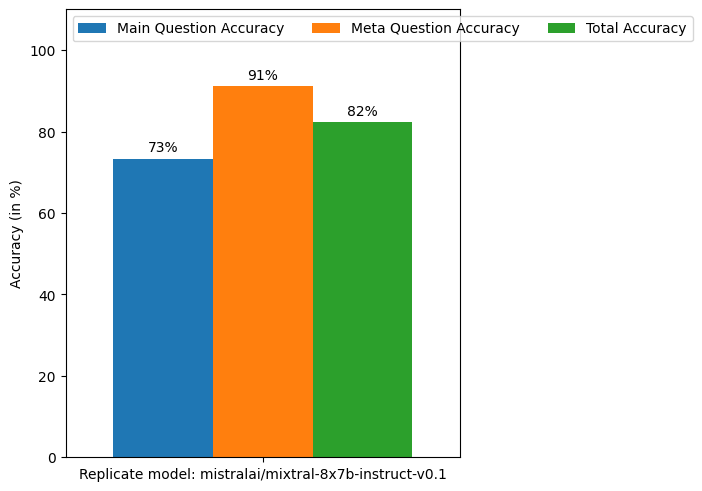

In [59]:
x = np.arange(len(model_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.0f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (in %)')
ax.set_xticks(x + width, model_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

x0, x1, y0, y1 = plt.axis()
margin_x = 0.1 * (x1-x0)
margin_y = 0.1 * (y1-y0)
plt.axis((x0 - margin_x,
          x1 + margin_x,
          y0,
          y1 + margin_y))

plt.show()